<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/mlp_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
earlystopping_patience = 10

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 5s 16ms/step - loss: 0.6243 - accuracy: 0.6201 - val_loss: 0.2948 - val_accuracy: 0.8749
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1899 - accuracy: 0.9290 - val_loss: 0.3019 - val_accuracy: 0.8748
Epoch 3/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0697 - accuracy: 0.9828 - val_loss: 0.3804 - val_accuracy: 0.8680
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0149 - accuracy: 0.9984 - val_loss: 0.4582 - val_accuracy: 0.8680
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0036 - accuracy: 0.9998 - val_loss: 0.5145 - val_accuracy: 0.8682
Epoch 6/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5595 - val_accuracy: 0.8693
Epoch 7/100
176/176 [==============================] - 2s 13ms/step - loss: 5.2875e-04 - accuracy: 1.0000 - val_loss: 0

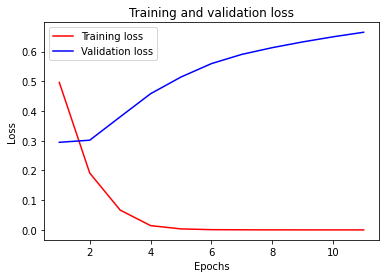

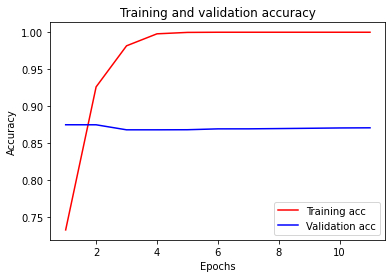

              precision    recall  f1-score   support

           0      0.865     0.888     0.877     12500
           1      0.885     0.861     0.873     12500

    accuracy                          0.875     25000
   macro avg      0.875     0.875     0.875     25000
weighted avg      0.875     0.875     0.875     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6774 - accuracy: 0.5443 - val_loss: 0.3234 - val_accuracy: 0.8616
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2299 - accuracy: 0.9104 - val_loss: 0.2987 - val_accuracy: 0.8773
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0720 - accuracy: 0.9799 - val_loss: 0.3883 - val_accuracy: 0.8615
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0135 - accuracy: 0.9983 - val_loss: 0.4838 - val_accuracy: 0.8625
Epoch 5/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0

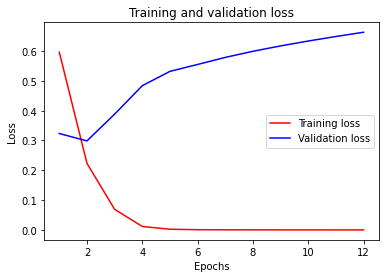

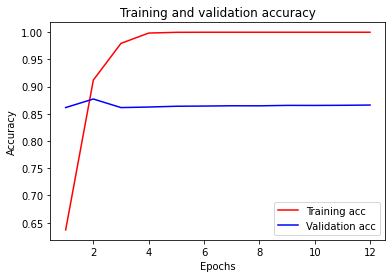

              precision    recall  f1-score   support

           0      0.894     0.856     0.875     12500
           1      0.862     0.898     0.880     12500

    accuracy                          0.877     25000
   macro avg      0.878     0.877     0.877     25000
weighted avg      0.878     0.877     0.877     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6184 - accuracy: 0.6182 - val_loss: 0.3210 - val_accuracy: 0.8631
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1788 - accuracy: 0.9333 - val_loss: 0.3276 - val_accuracy: 0.8683
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0497 - accuracy: 0.9883 - val_loss: 0.4301 - val_accuracy: 0.8570
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0092 - accuracy: 0.9993 - val_loss: 0.5090 - val_accuracy: 0.8624
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

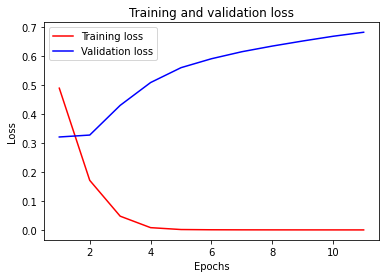

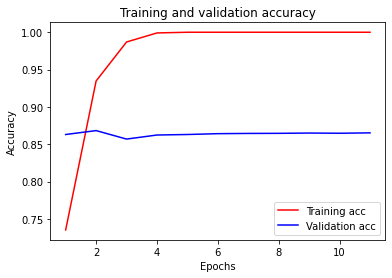

              precision    recall  f1-score   support

           0      0.819     0.931     0.872     12500
           1      0.921     0.795     0.853     12500

    accuracy                          0.863     25000
   macro avg      0.870     0.863     0.862     25000
weighted avg      0.870     0.863     0.862     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 3s 15ms/step - loss: 0.6185 - accuracy: 0.6186 - val_loss: 0.3048 - val_accuracy: 0.8698
Epoch 2/100
176/176 [==============================] - 2s 14ms/step - loss: 0.1783 - accuracy: 0.9328 - val_loss: 0.3189 - val_accuracy: 0.8691
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0538 - accuracy: 0.9861 - val_loss: 0.4097 - val_accuracy: 0.8633
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0096 - accuracy: 0.9991 - val_loss: 0.5104 - val_accuracy: 0.8624
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

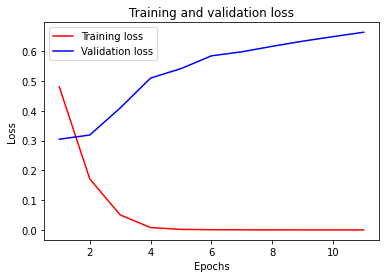

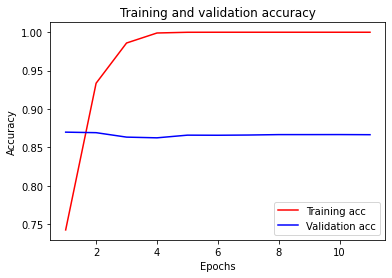

              precision    recall  f1-score   support

           0      0.903     0.829     0.864     12500
           1      0.842     0.911     0.875     12500

    accuracy                          0.870     25000
   macro avg      0.872     0.870     0.870     25000
weighted avg      0.872     0.870     0.870     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6043 - accuracy: 0.6339 - val_loss: 0.3013 - val_accuracy: 0.8710
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1739 - accuracy: 0.9363 - val_loss: 0.3223 - val_accuracy: 0.8654
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0535 - accuracy: 0.9872 - val_loss: 0.4130 - val_accuracy: 0.8620
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0097 - accuracy: 0.9991 - val_loss: 0.4978 - val_accuracy: 0.8608
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

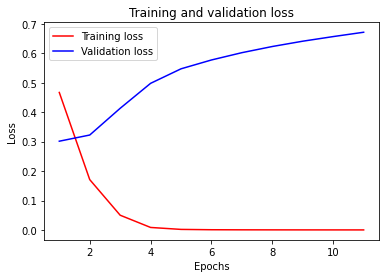

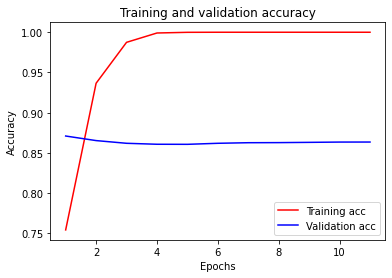

              precision    recall  f1-score   support

           0      0.911     0.822     0.864     12500
           1      0.838     0.920     0.877     12500

    accuracy                          0.871     25000
   macro avg      0.875     0.871     0.871     25000
weighted avg      0.875     0.871     0.871     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6773 - accuracy: 0.5528 - val_loss: 0.3297 - val_accuracy: 0.8558
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.2327 - accuracy: 0.9069 - val_loss: 0.2935 - val_accuracy: 0.8762
Epoch 3/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0974 - accuracy: 0.9726 - val_loss: 0.3503 - val_accuracy: 0.8652
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0268 - accuracy: 0.9954 - val_loss: 0.4603 - val_accuracy: 0.8609
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

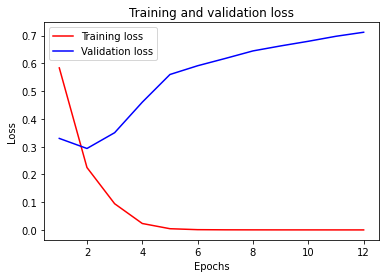

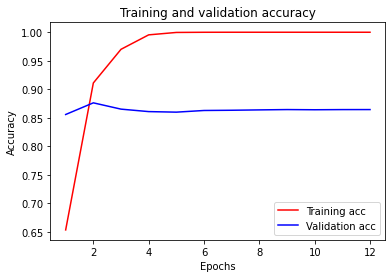

              precision    recall  f1-score   support

           0      0.867     0.890     0.878     12500
           1      0.887     0.863     0.875     12500

    accuracy                          0.876     25000
   macro avg      0.877     0.876     0.876     25000
weighted avg      0.877     0.876     0.876     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.6342 - accuracy: 0.6118 - val_loss: 0.2969 - val_accuracy: 0.8732
Epoch 2/100
176/176 [==============================] - 2s 13ms/step - loss: 0.1857 - accuracy: 0.9317 - val_loss: 0.3041 - val_accuracy: 0.8742
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0692 - accuracy: 0.9814 - val_loss: 0.3894 - val_accuracy: 0.8672
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0151 - accuracy: 0.9972 - val_loss: 0.4766 - val_accuracy: 0.8656
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

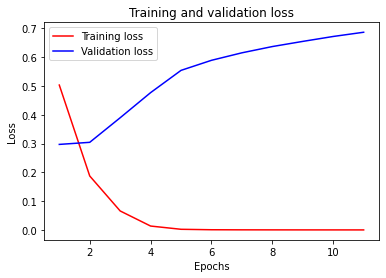

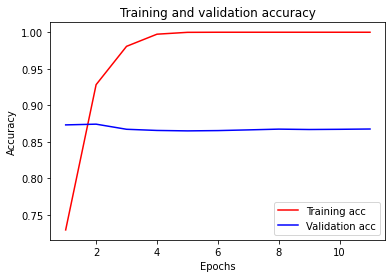

              precision    recall  f1-score   support

           0      0.862     0.888     0.875     12500
           1      0.885     0.858     0.871     12500

    accuracy                          0.873     25000
   macro avg      0.873     0.873     0.873     25000
weighted avg      0.873     0.873     0.873     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 3s 14ms/step - loss: 0.5952 - accuracy: 0.6483 - val_loss: 0.3086 - val_accuracy: 0.8668
Epoch 2/100
176/176 [==============================] - 2s 14ms/step - loss: 0.1739 - accuracy: 0.9367 - val_loss: 0.3316 - val_accuracy: 0.8637
Epoch 3/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0483 - accuracy: 0.9890 - val_loss: 0.4083 - val_accuracy: 0.8616
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0088 - accuracy: 0.9992 - val_loss: 0.4833 - val_accuracy: 0.8635
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0

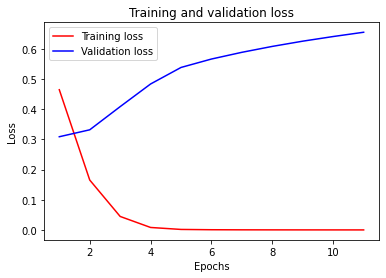

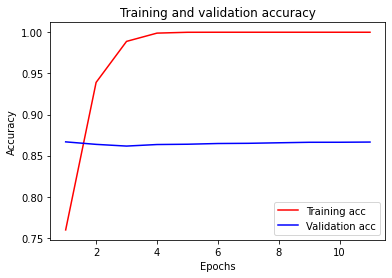

              precision    recall  f1-score   support

           0      0.907     0.817     0.860     12500
           1      0.833     0.917     0.873     12500

    accuracy                          0.867     25000
   macro avg      0.870     0.867     0.866     25000
weighted avg      0.870     0.867     0.866     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 3s 15ms/step - loss: 0.6414 - accuracy: 0.5928 - val_loss: 0.3030 - val_accuracy: 0.8710
Epoch 2/100
176/176 [==============================] - 2s 14ms/step - loss: 0.1968 - accuracy: 0.9291 - val_loss: 0.2998 - val_accuracy: 0.8745
Epoch 3/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0814 - accuracy: 0.9752 - val_loss: 0.3866 - val_accuracy: 0.8620
Epoch 4/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0203 - accuracy: 0.9966 - val_loss: 0.4779 - val_accuracy: 0.8616
Epoch 5/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0

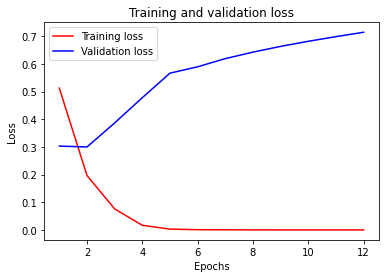

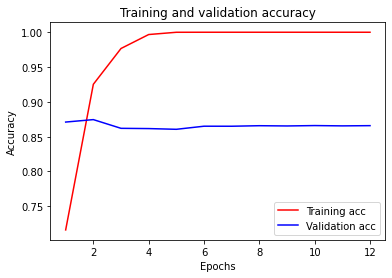

              precision    recall  f1-score   support

           0      0.895     0.848     0.871     12500
           1      0.856     0.901     0.878     12500

    accuracy                          0.875     25000
   macro avg      0.876     0.875     0.874     25000
weighted avg      0.876     0.875     0.874     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 3s 15ms/step - loss: 0.6635 - accuracy: 0.5712 - val_loss: 0.3143 - val_accuracy: 0.8656
Epoch 2/100
176/176 [==============================] - 2s 14ms/step - loss: 0.2014 - accuracy: 0.9247 - val_loss: 0.3120 - val_accuracy: 0.8715
Epoch 3/100
176/176 [==============================] - 2s 14ms/step - loss: 0.0612 - accuracy: 0.9835 - val_loss: 0.4018 - val_accuracy: 0.8607
Epoch 4/100
176/176 [==============================] - 2s 13ms/step - loss: 0.0130 - accuracy: 0.9986 - val_loss: 0.4737 - val_accuracy: 0.8629
Epoch 5/100
176/176 [==============================] - 2s 13ms/step - loss: 0.

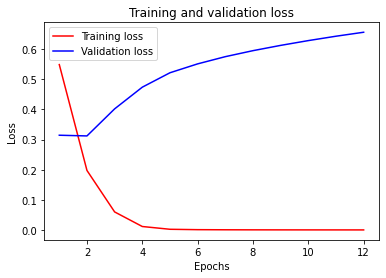

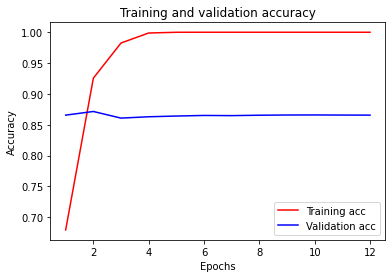

              precision    recall  f1-score   support

           0      0.877     0.865     0.871     12500
           1      0.866     0.878     0.872     12500

    accuracy                          0.871     25000
   macro avg      0.872     0.871     0.871     25000
weighted avg      0.872     0.871     0.871     25000


Average accuracy: 0.8741 (+/- 0.0099)
Average loss: 0.3006 (+/- 0.0118)
Average F1: 0.8727 (+/- 0.0070)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []
n = 1
for train, valid in kfold.split(x_train, y_train):

  print("KFold: {} starts.".format(n))
  del model
  tf.keras.backend.clear_session()

  model = Sequential([
    Embedding(input_dim=input_dim, output_dim=output_dim, input_length=max_len),
    Flatten(),
    # Hidden layers
    Dense(units=250, activation="relu"),
    # Output layer
    Dense(units=1, activation="sigmoid")
  ])

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_valid, y_valid),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_train[valid], y=y_train[valid], verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_valid, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")
  n += 1

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
